# San Francisco Police Department Crime Rate Reports

For this project we will be analyzing Sa Francisco Police Department Crime Rate reports from [Kaggle](https://www.kaggle.com/psmavi104/san-francisco-crime-data). The data contains the 
For this project we will use the classification methods to determine with crime be classified as Open or Active, Cite or Arrest Adult, Unfounded, Cite or Arrest Juvenile, Exceptional Adult, Exceptional Juvenile   
[Kaggle](https://www.kaggle.com/psmavi104/san-francisco-crime-data).

[Part 1: Exploratory Data Analysis](#Part-1:-Exploratory-Data-Analysis)

[Part 2: Feature Engineering](#Part-2:-Feature-Engineering)

[Part 3: Random Forest Models](#Part-3:-Random-Forest-Modeling)

[Part 4: Principal Component Analysis ](#Part-4:-PCA)


[Part 5: Support Vector Machines](#Part-5:-Support-Vector-Machine)


## Data and Setup

** Import some libraries **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import warnings
from wordcloud import WordCloud

%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

** Read in the csv file as a dataframe called df **

In [2]:
df  = pd.read_csv('SFCD_2018.csv')

## Exploring Data

In [3]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

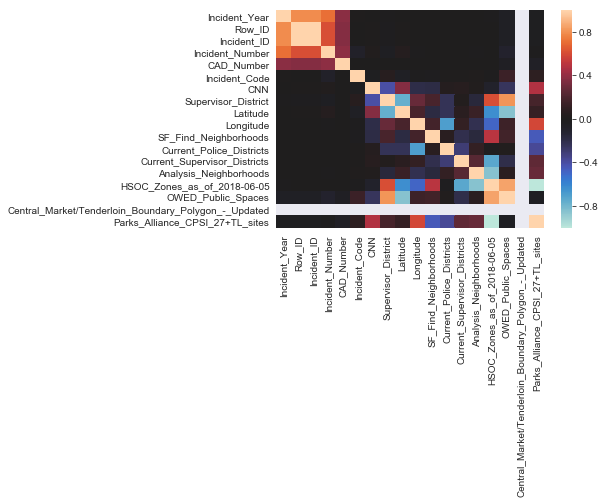

In [4]:
sns.heatmap(df.corr(),center =0)

In [5]:
df_2 = df.drop(['CAD_Number', 'Report_Type_Code', 'Filed_Online', 'Incident_Code',
       'Incident_Category', 'Incident_Subcategory', 'Intersection', 'CNN', 'Police_District',
       'Analysis_Neighborhood', 'Supervisor_District',
       'point', 'SF_Find_Neighborhoods', 'Current_Police_Districts',
       'Current_Supervisor_Districts', 'Analysis_Neighborhoods',
       'HSOC_Zones_as_of_2018-06-05', 'OWED_Public_Spaces',
       'Central_Market/Tenderloin_Boundary_Polygon_-_Updated'], axis = 1)

In [6]:
df_2.dropna(how='all') 

,Incident_Datetime,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Row_ID,Incident_ID,Incident_Number,Report_Type_Description,Incident_Description,Resolution,Latitude,Longitude,Parks_Alliance_CPSI_27+TL_sites
0,2018/07/18 01:30:00 PM,2018/07/18,13:30,2018,Wednesday,2018/07/18 01:31:00 PM,69250964070,692509,180536729,Initial,Suspicious Occurrence,Unfounded,NaN,NaN,NaN
1,2019/04/08 05:25:00 AM,2019/04/08,05:25,2019,Monday,2019/04/13 01:34:00 PM,79165671000,791656,196076240,Coplogic Initial,Lost Property,Open or Active,NaN,NaN,NaN
2,2019/06/05 02:00:00 PM,2019/06/05,14:00,2019,Wednesday,2019/06/05 02:30:00 PM,81006072000,810060,190416337,Initial,Found Property,Open or Active,37.782685,-122.422464,NaN
3,2019/04/16 08:20:00 PM,2019/04/16,20:20,2019,Tuesday,2019/04/17 12:21:00 AM,79171306244,791713,196076024,Coplogic Initial,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,NaN
4,2019/06/10 11:00:00 AM,2019/06/10,11:00,2019,Monday,2019/06/10 11:00:00 AM,81012372000,810123,190393440,Initial Supplement,Found Property,Open or Active,37.779091,-122.464145,NaN
5,2019/06/10 06:57:00 PM,2019/06/10,18:57,2019,Monday,2019/06/10 06:57:00 PM,81021904134,810219,190417987,Initial,Battery,Cite or Arrest Adult,37.784449,-122.416072,NaN
6,2019/04/18 01:42:00 PM,2019/04/18,13:42,2019,Thursday,2019/04/18 01:58:00 PM,79186007045,791860,190256832,Vehicle Supplement,"Vehicle, Recovered, Truck",Open or Active,NaN,NaN,NaN
7,2019/06/10 01:30:00 AM,2019/06/10,01:30,2019,Monday,2019/06/10 02:53:00 AM,80997904134,809979,190416070,Initial,Battery,Open or Active,37.723168,-122.442554,NaN
8,2019/06/09 11:08:00 PM,2019/06/09,23:08,2019,Sunday,2019/06/10 09:28:00 PM,81026328150,810263,190418264,Initial,"Malicious Mischief, Vandalism to Property",Open or Active,37.792487,-122.405654,NaN
9,2019/06/03 01:15:00 PM,2019/06/03,13:15,2019,Monday,2019/06/05 05:43:00 PM,81004006374,810040,190398365,Coplogic Supplement,"Theft, Other Property, >$950",Open or Active,37.770964,-122.431904,NaN


In [7]:
# plt.rcParams['figure.figsize'] = (10, 8)
# plt.style.use('bmh')
# wc = WordCloud(background_color = 'white', width = 1800, height = 1700).generate(str(df_2['Incident_Description']))
# plt.imshow(wc)
# plt.axis('off')
# plt.show()

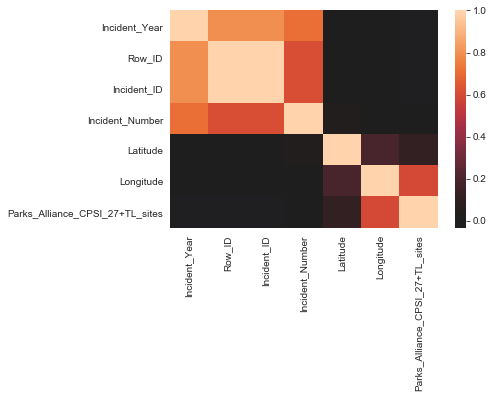

In [8]:
sns.heatmap(df_2.corr(),center =0)

In [9]:
df_2['Incident_Datetime'] = pd.to_datetime(df_2['Incident_Datetime'])

In [10]:
#df_2.columns

In [11]:
df_2['date'] = df_2['Incident_Datetime'].apply(lambda t: t.date())

In [12]:
df_2['month'] = df_2['Incident_Datetime'].apply(lambda time: time.month)

In [13]:
df_2['hour'] = df_2['Incident_Datetime'].apply(lambda time: time.hour)

In [14]:
df_2['day'] = df_2['Incident_Datetime'].apply(lambda time: time.hour)

In [15]:
df_2.drop(['Incident_Date', 'Incident_Time', 'Incident_Year','Row_ID', 'Incident_ID', 'Report_Type_Description', 'Parks_Alliance_CPSI_27+TL_sites','Incident_Number', 'Report_Datetime','Incident_Datetime'], axis  = 1, inplace=True)

In [16]:
df_2.dropna(axis=0, inplace=True)

## Basic Questions

** What are the top 20 crimes in San Francisco? **

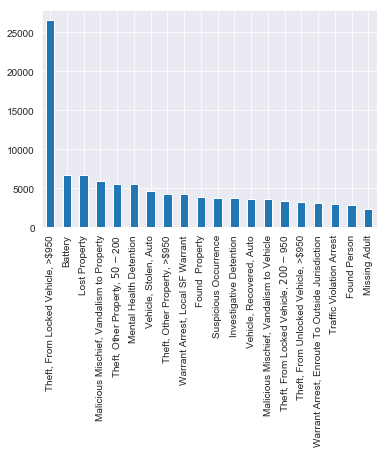

In [17]:
df_2.Incident_Description.value_counts().head(20).plot(kind='bar')

In [18]:
byMonth = df_2.groupby('Incident_Day_of_Week').count()

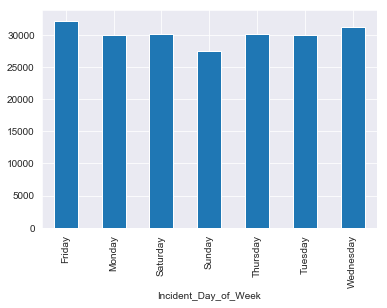

In [19]:
byMonth['Incident_Description'].plot(kind='bar')

In [20]:
df_2.Resolution.value_counts(normalize = True)

Open or Active             0.741298
Cite or Arrest Adult       0.240525
Unfounded                  0.007813
Cite or Arrest Juvenile    0.007296
Exceptional Adult          0.002736
Exceptional Juvenile       0.000332
Name: Resolution, dtype: float64

In [21]:
crimes=list(df_2.Incident_Description.values)
key_crimes = []
for x in crimes:
    crime = x.split()
    for c in crime:
        key_crimes.append(c.strip(','))
    

In [22]:
crimes_df = pd.DataFrame(key_crimes)

In [23]:
key_cr = ['Larceny','Theft', 'Assault', 'Vandalism', 'Burglary',
          'Battery','Rape','Possession', 'Robbery','Fraudulent','Mental','Violation','Person',
         'Suspicious','Shoplifting','Traffic','Vehicle']

In [24]:
def assign_crime(x):
    cr = 'general'
    for crime in key_cr:
        if crime in x:
            cr = crime
    return cr
df_2['Crime'] = df_2.Incident_Description.apply(assign_crime)
    

In [25]:
df_3 = df_2[df_2.Crime != 'general']


In [26]:
crimes_pd = pd.concat([df_3,pd.get_dummies(df_3.Crime)],axis = 1)
crimes_pd = pd.concat([crimes_pd,pd.get_dummies(crimes_pd.Incident_Day_of_Week)],axis = 1)

In [27]:
crimes_pd.drop(['Incident_Description','date','Incident_Day_of_Week','Crime'], axis = 1, inplace = True)

In [28]:
crimes_pd.reset_index(drop=True)

,Resolution,Latitude,Longitude,month,hour,day,Assault,Battery,Burglary,Fraudulent,...,Vandalism,Vehicle,Violation,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Cite or Arrest Adult,37.784449,-122.416072,6,18,18,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Open or Active,37.723168,-122.442554,6,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Open or Active,37.792487,-122.405654,6,23,23,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,Open or Active,37.770964,-122.431904,6,13,13,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Open or Active,37.765323,-122.443538,6,2,2,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,Open or Active,37.781677,-122.492375,6,19,19,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,Open or Active,37.789529,-122.413728,6,17,17,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7,Open or Active,37.727115,-122.405586,6,11,11,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,Exceptional Adult,37.770470,-122.443312,5,20,20,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,Open or Active,37.785373,-122.431366,6,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [40]:
X = crimes_pd.drop('Resolution', axis = 1)
y = crimes_pd.Resolution
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state = 212)

In [41]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

In [43]:
res1 = clf.fit(X_train,y_train)

In [44]:
res1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
y_hat = clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_hat)

0.8139566518545388

In [47]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix

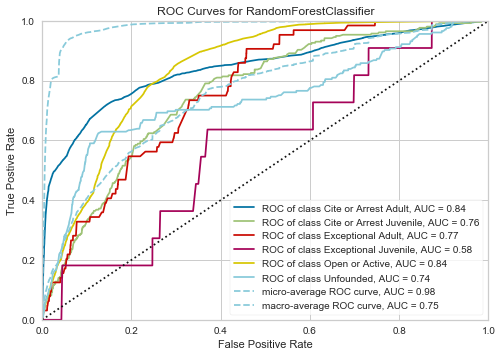

In [48]:
visualizer = ROCAUC(clf)

visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.poof()   

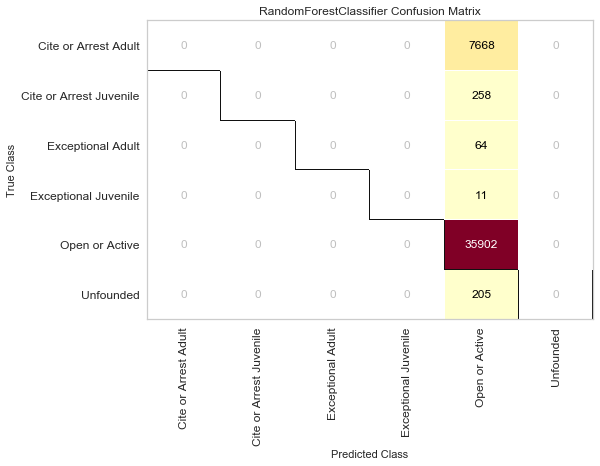

In [49]:
cm = ConfusionMatrix(clf)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [50]:

y_test.value_counts(normalize=True)

Open or Active             0.813957
Cite or Arrest Adult       0.173846
Cite or Arrest Juvenile    0.005849
Unfounded                  0.004648
Exceptional Adult          0.001451
Exceptional Juvenile       0.000249
Name: Resolution, dtype: float64

In [51]:
clf_RF_weights = RandomForestClassifier(n_jobs=-1,class_weight={'Open or Active':0.81,
                                                      'Cite or Arrest Adult':0.17,
                                                     'Cite or Arrest Juvenile': .006,
                                                     "Unfounded":0.004648,
                                                     "Exceptional Adult":0.001451,
                                                    "Exceptional Juvenile":0.000249},
                                        max_depth = 1000, random_state = 24,n_estimators=1000)

In [52]:
clf_RF_weights.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True,
            class_weight={'Open or Active': 0.81, 'Cite or Arrest Adult': 0.17, 'Cite or Arrest Juvenile': 0.006, 'Unfounded': 0.004648, 'Exceptional Adult': 0.001451, 'Exceptional Juvenile': 0.000249},
            criterion='gini', max_depth=1000, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False, random_state=24,
            verbose=0, warm_start=False)

In [53]:
y_hat = clf_RF_weights.predict(X_test)

acc = accuracy_score(y_test, y_hat) * 100
print(f"Accuracy Score is {acc}")

Accuracy Score is 88.68685952661649


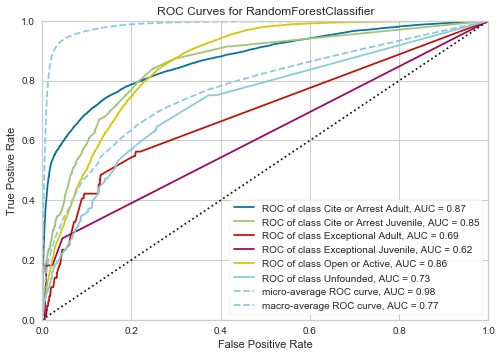

In [54]:
visualizer = ROCAUC(clf_RF_weights)

visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.poof()  

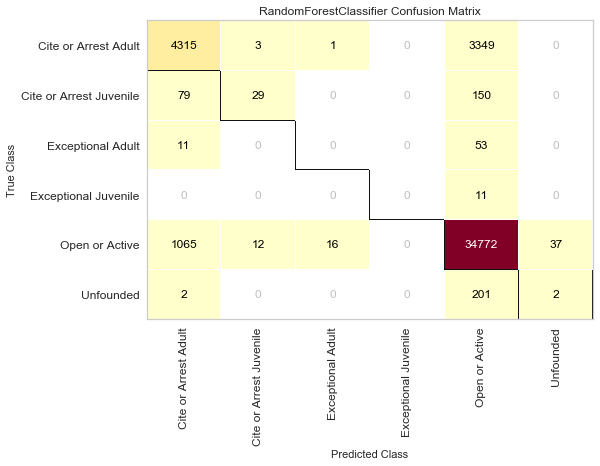

In [55]:
cm = ConfusionMatrix(clf_RF_weights)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [56]:
crimes_pd.to_csv("data/crime_data.csv", index=False)

In [57]:
import numpy as np
from sklearn.model_selection import KFold

X = crimes_pd.drop('Resolution', axis = 1)
y = crimes_pd.Resolution




In [58]:
def K_Fold_Classification(X,y,n):
    kf = KFold(n_splits=n)
    kf.get_n_splits(X)
    train_score = []
    test_score = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf_RF_weights.fit(X_train,y_train)
        y_hat = clf_RF_weights.predict(X_test)
        y_hat_train = clf_RF_weights.predict(X_train)
        acc = accuracy_score(y_test, y_hat) * 100
        acc_train = accuracy_score(y_train, y_hat_train) * 100
        train_score.append(acc_train)
        test_score.append(acc)
    return train_score,test_score


In [59]:
train, test = K_Fold_Classification(X,y,5)

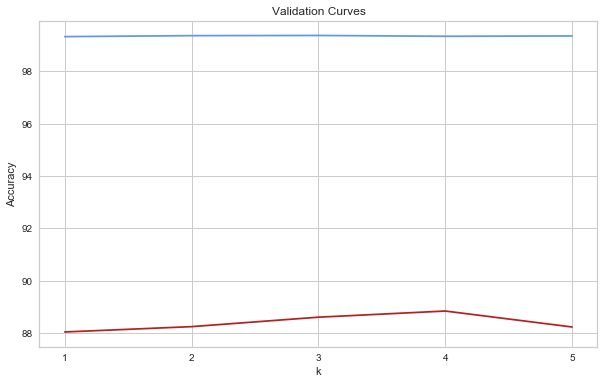

In [ ]:

xs = list(range(1, 6))
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.
axes = figure.add_subplot(1, 1, 1)

axes.plot(xs, test, color="firebrick")
axes.plot(xs, train, color="cornflowerblue")

axes.set_xticks(xs)
axes.set_xticklabels([str(x) for x in xs])

axes.set_title("Validation Curves")
axes.set_xlabel("k")
axes.set_ylabel("Accuracy")

plt.show()
plt.close()

In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(f"The accuracy score is {accuracy_score(y_test, y_pred)}")

[[ 3417     0     0     0  4251     0]
 [   60     0     0     0   198     0]
 [   13     0     0     0    51     0]
 [    0     0     0     0    11     0]
 [  464     0     0     0 35438     0]
 [    1     0     0     0   204     0]]
                         precision    recall  f1-score   support

   Cite or Arrest Adult       0.86      0.45      0.59      7668
Cite or Arrest Juvenile       0.00      0.00      0.00       258
      Exceptional Adult       0.00      0.00      0.00        64
   Exceptional Juvenile       0.00      0.00      0.00        11
         Open or Active       0.88      0.99      0.93     35902
              Unfounded       0.00      0.00      0.00       205

              micro avg       0.88      0.88      0.88     44108
              macro avg       0.29      0.24      0.25     44108
           weighted avg       0.87      0.88      0.86     44108

The accuracy score is 0.8809059581028384


In [ ]:
clf_GS = RandomForestClassifier(n_jobs=-1,
                                class_weight={'Open or Active':0.81,
                                             'Cite or Arrest Adult':0.17,
                                             'Cite or Arrest Juvenile':0.006,
                                             "Unfounded":0.004648,
                                             "Exceptional Adult":0.001451,
                                             "Exceptional Juvenile":0.000249},
                                random_state = 24)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
X_train.shape

(102918, 28)

In [ ]:
y_train.shape

(102918,)

In [ ]:
CV_rfc = GridSearchCV(estimator=clf_GS, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_score_

In [ ]:
CV_rfc.best_params_

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)

In [ ]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca,y,test_size = .3, random_state = 212)

In [ ]:
clf_RF_weights.fit(X_pca_train,y_pca_train)
y_pca_hat = clf_RF_weights.predict(X_pca_test)
acc = accuracy_score(y_pca_test,y_pca_hat)
print(acc)

In [ ]:
cm = ConfusionMatrix(clf_RF_weights)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_pca_test, y_pca_test)

# How did we do?
plt.savefig('figures/CM2.png')
cm.poof()

# Support Vector Machines

## Train Test Split

** Split your data into a training set and a testing set.**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = crimes_pd.drop('Resolution',axis=1)
y = crimes_pd['Resolution']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [31]:
crimes_pd['Resolution'].head()

5     Cite or Arrest Adult
7           Open or Active
8           Open or Active
9           Open or Active
10          Open or Active
Name: Resolution, dtype: object

# Train a Model

Now its time to train a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [32]:
from sklearn.svm import SVC

In [33]:
svc_model = SVC()
svc_model = SVC(kernel='linear') 

In [34]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [35]:
predictions = svc_model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [37]:
print(confusion_matrix(y_test,predictions))

[[ 3447     0     0     0  4214     0]
 [   55     0     0     0   222     0]
 [    8     0     0     0    73     0]
 [    1     0     0     0     7     0]
 [  440     0     0     0 35450     0]
 [    7     0     0     0   184     0]]


In [38]:
print(accuracy_score(y_test,predictions))

0.8818581663190351


In [39]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

   Cite or Arrest Adult       0.87      0.45      0.59      7661
Cite or Arrest Juvenile       0.00      0.00      0.00       277
      Exceptional Adult       0.00      0.00      0.00        81
   Exceptional Juvenile       0.00      0.00      0.00         8
         Open or Active       0.88      0.99      0.93     35890
              Unfounded       0.00      0.00      0.00       191

              micro avg       0.88      0.88      0.88     44108
              macro avg       0.29      0.24      0.25     44108
           weighted avg       0.87      0.88      0.86     44108



## Gridsearch Practice

** Import GridsearchCV from SciKit Learn.**

In [ ]:
from sklearn.model_selection import GridSearchCV

**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

In [ ]:
param_grid = {'C': [0.1,1], 'gamma': [1,0.1]} 

** Create a GridSearchCV object and fit it to the training data.**

In [ ]:
grid = GridSearchCV(SVC(), param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

** Now take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them.**

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))

In [ ]:
pd.to_pickle(grid, "GridSeach_RF.pkl")